In [1]:
import scanpy as sc
import multigrate
import gdown
import h5py
import numpy as np
from mofapy2.run.entry_point import entry_point

In [2]:
%config InlineBackend.figure_format = 'retina'

# MOFA 2

## Load the dataset

In [3]:
gdown.download(
    'https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D',
    'kotliarov2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D
To: /home/aomidi/theis/multigrate/example/kotliarov-expressions.h5ad
420MB [02:22, 2.94MB/s] 


'kotliarov-expressions.h5ad'

In [3]:
scrna = sc.read_h5ad('kotliarov2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 53196 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
gdown.download(
    'https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM',
    'kotliarov2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM
To: /home/aomidi/theis/multigrate/example/kotliarov-proteins.h5ad
145MB [00:48, 2.96MB/s] 


'kotliarov-proteins.h5ad'

In [4]:
cite = sc.read_h5ad('kotliarov2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 53196 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Clean the data

In [5]:
# use more general annotation
# can change to cluster_level2 or cluster_level3 if needed (finer annotation)
scrna.obs['cell_type'] = scrna.obs['cluster_level1'].astype(str)
cite.obs['cell_type'] = cite.obs['cluster_level1'].astype(str)

In [6]:
scrna1 = scrna[scrna.obs['batch'] == 1]
scrna2 = scrna[scrna.obs['batch'] == 2]

In [7]:
scrna1

View of AnnData object with n_obs × n_vars = 28229 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
scrna2

View of AnnData object with n_obs × n_vars = 24967 × 3999
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
cite1 = cite[cite.obs['batch'] == 1]
cite2 = cite[cite.obs['batch'] == 2]

In [10]:
cite1

View of AnnData object with n_obs × n_vars = 28229 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
cite2

View of AnnData object with n_obs × n_vars = 24967 × 87
    obs: 'n_genes', 'batch', 'cluster_level1', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type'
    var: 'gene_symbols', 'n_cells'
    uns: 'batch_colors', 'cluster_level1_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [20]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [21]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [22]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [cite1.X, cite2.X]],
    views_names=['scRNA', 'scADT'],
    groups_names=['1', '2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='1' with N=28229 samples and D=3999 features...
Successfully loaded view='scRNA' group='2' with N=24967 samples and D=3999 features...
Successfully loaded view='scADT' group='1' with N=28229 samples and D=87 features...
Successfully loaded view='scADT' group='2' with N=24967 samples and D=87 features...




In [23]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scADT): gaussian




In [24]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [25]:
ent.build()

In [26]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -2685481896.61 

Iteration 1: time=58.55, ELBO=241381246.71, deltaELBO=2926863143.323 (108.98837736%), Factors=19
Iteration 2: time=55.89, ELBO=247847519.63, deltaELBO=6466272.917 (0.24078632%), Factors=18
Iteration 3: time=52.81, ELBO=248201618.93, deltaELBO=354099.305 (0.01318569%), Factors=17
Iteration 4: time=50.37, ELBO=248465585.53, deltaELBO=263966.603 (0.00982939%), Factors=16
Iteration 5: time=48.00, ELBO=248711039.40, deltaELBO=245453.869 (0.00914003%), Factors=15
Iteration 6: time=45.64, ELBO=248768403.88, deltaELBO=57364.479 (0.00213610%), Factors=14
Iteration 7: time=44.07, ELBO=248789549.89, deltaELBO=21146.011 (0.00078742%), Factors=14
Iteration 8: time=44.00, ELBO=248812780.91, deltaELBO=23231.020 (0.00086506%), Factors=14
Iteration 9: time=44.26, ELBO=248826394.72, deltaELBO=13613.812 (0.00050694%), Factors=14
Iteration 10: time=4

In [27]:
outfile = 'kotliarov2020-mofa.hdf5'
ent.save(outfile)

Saving model in kotliarov2020-mofa.hdf5...


In [28]:
f = h5py.File(outfile)

In [29]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T

In [30]:
z.shape

(53196, 13)

In [31]:
# zs = np.concatenate([v[:] for k, v in f["samples"].items()], axis=0).astype(str)
# z = pd.DataFrame(z, index=zs).loc[adata.obs_names.values].to_numpy()

In [32]:
# adata.obsm['X_mofa'] = z
# w = np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T
# adata.varm['LFs'] = w

In [33]:
# np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T.shape

In [34]:
# f.keys()

In [35]:
# [v for k, v in f['expectations']['W'].items()]

In [36]:
z = sc.AnnData(z)
z.obs['cell_type'] = scrna.obs['cell_type'].tolist()

In [51]:
z.obs['batch'] = scrna.obs['batch'].tolist()
z.obs['batch'] = z.obs['batch'].astype('category')

In [37]:
sc.pp.neighbors(z)
sc.tl.umap(z)

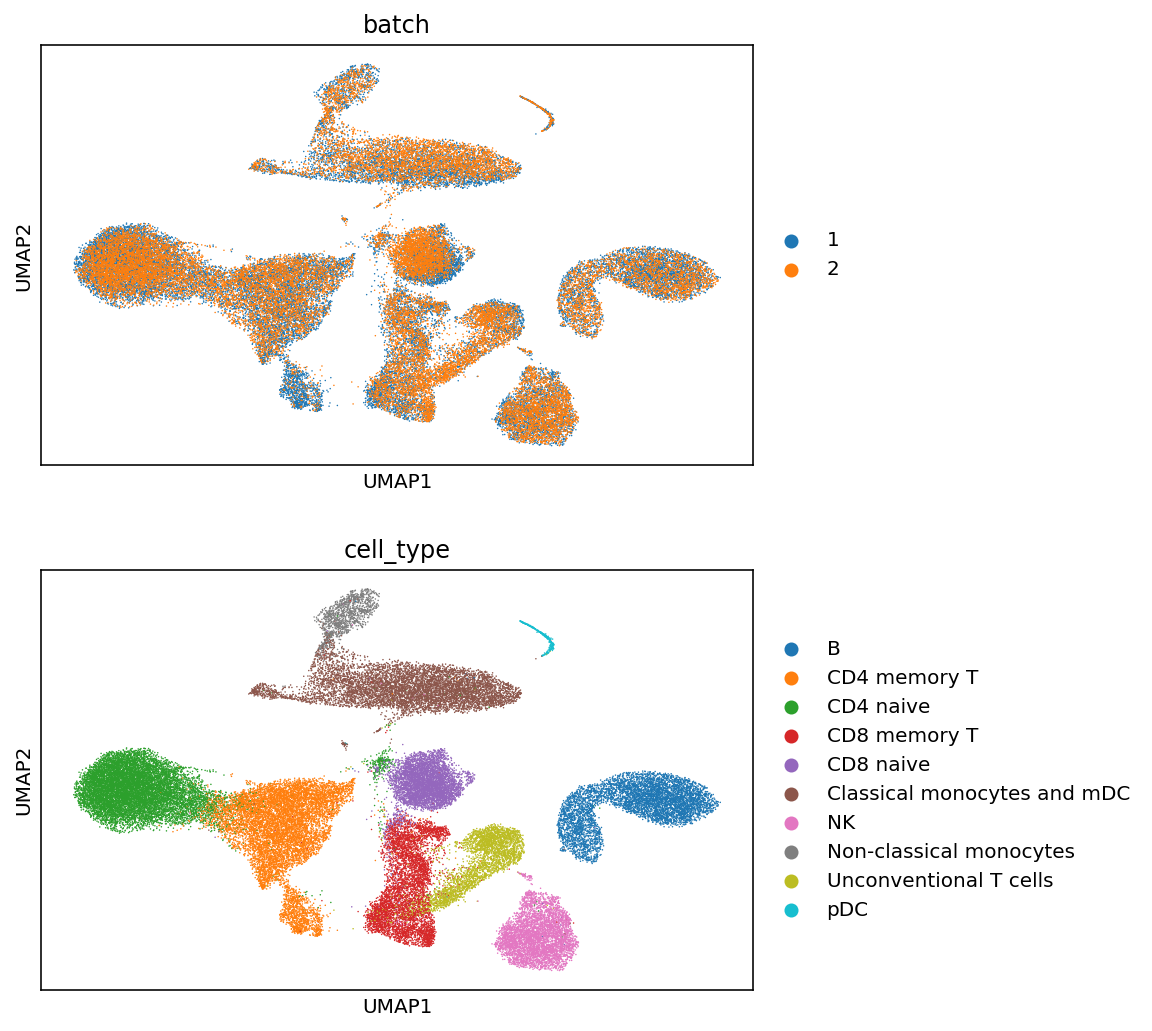

In [53]:
sc.pl.umap(z, color=['batch', 'cell_type'], ncols=1)

In [54]:
sc.pp.pca(z)
multigrate.metrics.metrics(
    z, z,
    batch_key='batch',
    label_key='cell_type',
    isolated_label_asw=False,
    method='MOFA'
)

Clustering...
ASW label/batch...
PCR batch...
Graph connectivity...
ASW label...
NMI cluster/label...
ARI cluster/label...


,score
ASW_label/batch,0.938097
PCR_batch,NaN
graph_conn,0.996768
ASW_label,0.727353
NMI_cluster/label,0.899567
ARI_cluster/label,0.865977
